In [1]:
#Done python2.0
import numpy as np
import matplotlib
matplotlib.use('Qt4Agg')
from sklearn.datasets import fetch_mldata
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from ggplot import *

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("zoo.csv",sep=",")
data.drop('animal_name',axis=1,inplace=True)

In [4]:
X_train = data.drop('class_type',axis = 1)
Y_train = data.class_type
features_cols = X_train.columns.astype('str')
data.class_type = data.class_type.apply(lambda i: str(i))

In [5]:

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## This Kernel creates plot PCA nd TSNE DEcompositions!!

In [6]:
r_perm = np.random.permutation(data.shape[0])


In [7]:

pca=PCA(n_components=3)
pca_result = pca.fit_transform(data[features_cols].values)




In [8]:
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1]
data['pca-three'] = pca_result[:,2]

## PCA PLOT in 3D

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


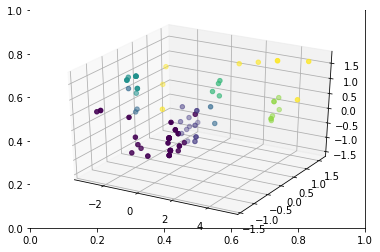

In [10]:
from mpl_toolkits.mplot3d import axes3d
fig= plt.figure()
ax = fig.add_subplot(1,1,1,axisbg='1.0')
ax = fig.gca(projection = '3d')


ax.scatter(data['pca-one'].values, data['pca-two'], data['pca-three'],c = data.class_type)
plt.legend(loc=2)

In [11]:
plt.show()

##  PCA plot 2D

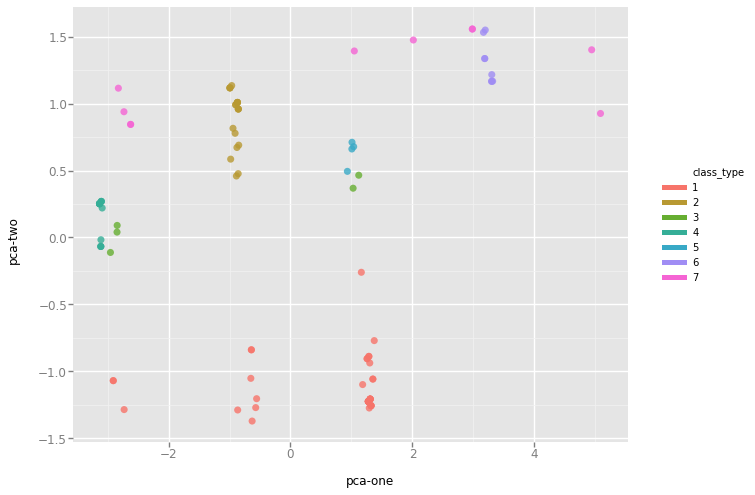

<ggplot: (298279693)>

In [12]:
chart = ggplot(data, aes(x = 'pca-one',y='pca-two',color='class_type'))  + geom_point(size=50,alpha=0.8)
 
chart

## Plot of TSNE 2D

In [13]:
n_sne=75
tsne= TSNE(n_components=2,verbose=1,perplexity=20,n_iter=2000,method='exact',learning_rate=125)
tsne_results=tsne.fit_transform(data.loc[r_perm[:n_sne],features_cols].values)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 1.409094
[t-SNE] KL divergence after 100 iterations with early exaggeration: 10.518338
[t-SNE] Error after 175 iterations: 10.518338


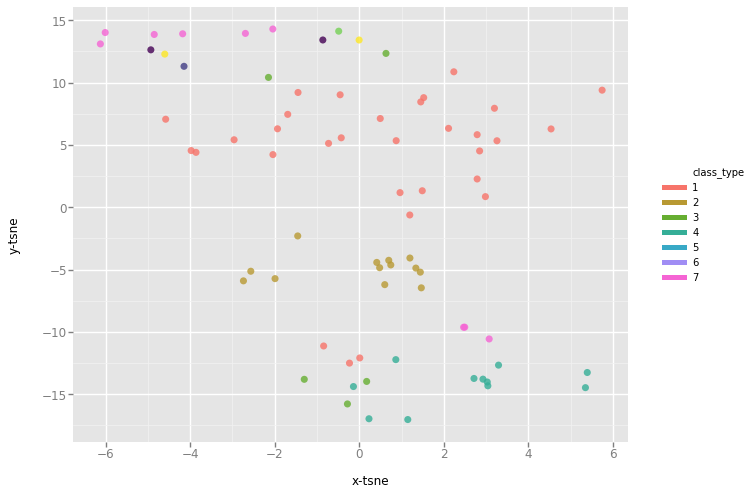

<ggplot: (298362317)>

In [14]:
df_tsne= data.loc[r_perm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot(df_tsne , aes(x = 'x-tsne',y='y-tsne',color='class_type'))  + geom_point(size=50,alpha=0.8)
 
chart

In [15]:
n_sne=101
tsne= TSNE(n_components=3,verbose=1,perplexity=20,n_iter=2000,method='exact',learning_rate=50,angle=0.1)
tsne_pca_results=tsne.fit_transform(pca_result)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 101 / 101
[t-SNE] Mean sigma: 0.574739
[t-SNE] KL divergence after 100 iterations with early exaggeration: 10.405012
[t-SNE] Error after 775 iterations: 10.405012


## Plot of TSNE + PCA 2D and 3D

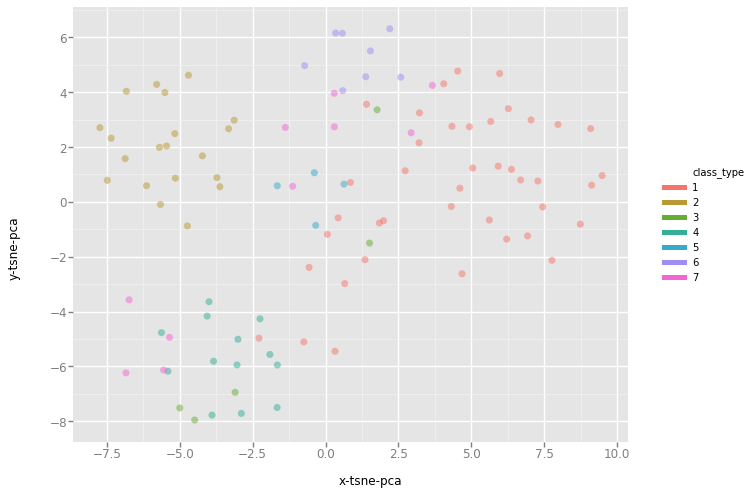

<ggplot: (298208829)>

In [16]:
df_tsne = None
df_tsne = data.copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]
df_tsne['z-tsne-pca'] = tsne_pca_results[:,2]


chart = ggplot(df_tsne , aes(x = 'x-tsne-pca',y='y-tsne-pca',color='class_type'))  + geom_point(size=50,alpha=0.5)
 
chart




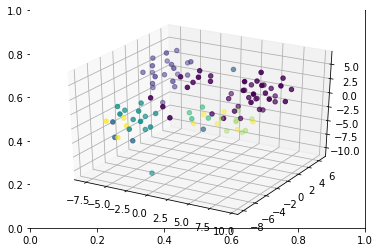

In [19]:
from mpl_toolkits.mplot3d import axes3d
fig= plt.figure()
ax = fig.add_subplot(1,1,1,axisbg='1.0')
ax = fig.gca(projection = '3d')


ax.scatter(df_tsne['x-tsne-pca'].values, df_tsne['y-tsne-pca'], df_tsne['z-tsne-pca'],c = df_tsne.class_type)
plt.legend(loc=0)
